In [1]:
# import libaries 
import numpy as np 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

### A function that creates and trains the model 

In [2]:
def buildAndTrainModel(x,y):
    ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), #activation function
    nn.Linear(1,1) #output Layer
        )
    #learning rate
    learningRate = .05

    #loss function 
    lossfun = nn.MSELoss()

    #optimizer(the flavor of gradient descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)
    # train the model 
    numepochs = 500
    losses = torch.zeros(numepochs)
    for epochi in range(numepochs):
        #forward pass
        yHat = ANNreg(x)
        #compute loss
        loss = lossfun(yHat,y)
        losses[epochi] = loss
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    predictions = ANNreg(x)
    return predictions, losses

### A function that creates the data

In [3]:
def createData(m):
    N = 50
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2 
    return x,y

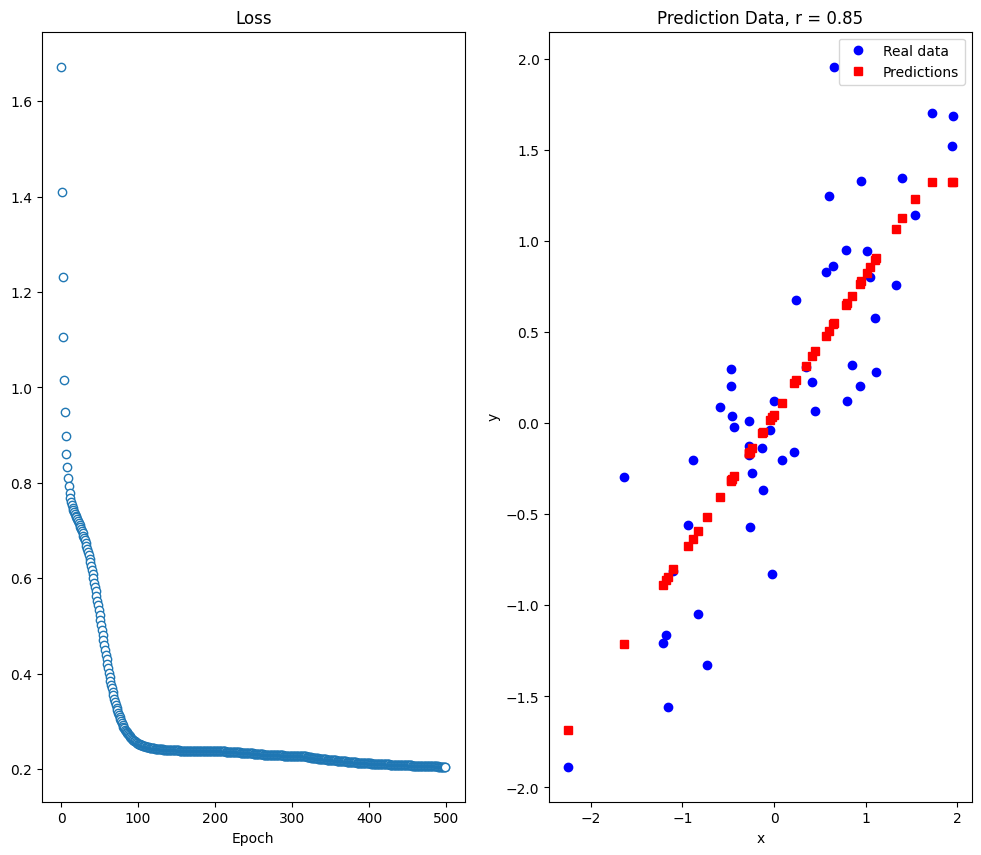

In [19]:
# create a dataset
x,y = createData(.8)

#run the model
yHat, losses = buildAndTrainModel(x,y)

fig,ax = plt.subplots(1,2,figsize=(12,10))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')
# y_np = y.detach().numpy()
yHat_np = yHat.detach().numpy()

ax[1].plot(x,y,'bo',label="Real data")
ax[1].plot(x,yHat_np,'rs',label = 'Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
# correlation_coefficient = np.corrcoef(y.T,yHat.T)[0, 1]
ax[1].set_title(f'Prediction Data, r = {np.corrcoef(y.T,yHat_np.T)[0, 1]:.2f}')
ax[1].legend()

plt.show()

In [23]:
# the slopes to simulate
slopes = np.linspace(-2,2,21)

numExps = 50

# initialize output matrix

results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):
    for N in range(numExps):
        #create the dataset and run the model
        x,y = createData(slopes[slopei])
        yHat,losses = buildAndTrainModel(x,y)

        #store the final loss and performance
        results[slopei,N,0] = losses[-1]
        results[slopei, N, 1] = np.corrcoef(y.T, yHat.detach().T)[0, 1]


#correlation can be 0 if the model didn't do well. set nan's -> 0
results[np.isnan(results)] = 0


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


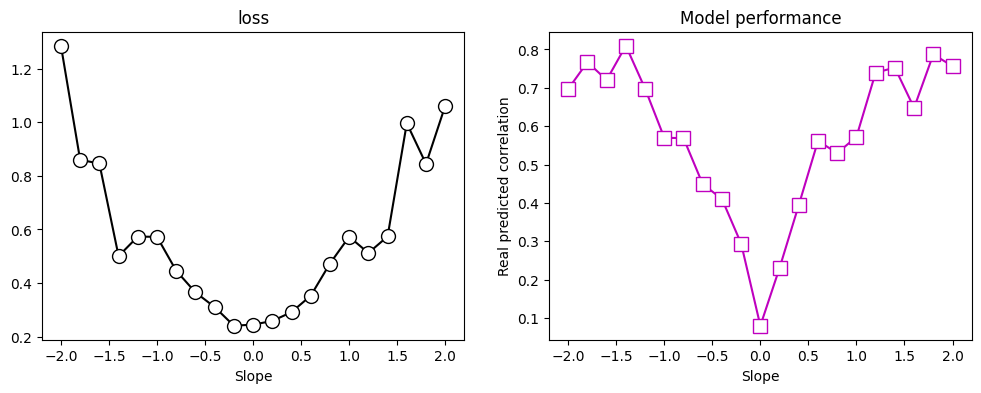

In [28]:
# plot the results

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor ='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor ='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real predicted correlation')
ax[1].set_title('Model performance')

plt.show()

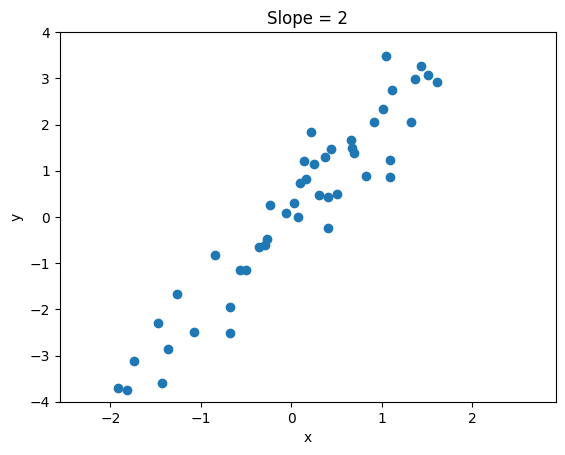

In [29]:
m = 2

x,y = createData(m)

plt.title('Slope = ' + str(m))
plt.plot(x,y,'o')
plt.ylim([-4,4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()